In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('car_evaluation.csv')

In [3]:
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
data.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'decision']
data.columns=col_names

In [6]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,decision
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,5more,more,med,high,unacc
freq,432,432,432,576,576,576,1209


(array([1209.,    0.,    0.,  384.,    0.,    0.,   65.,    0.,    0.,
          69.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

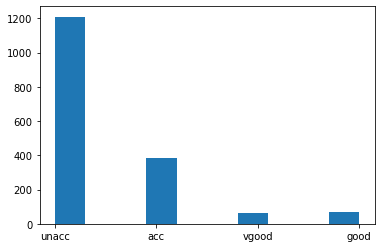

In [7]:
#punem in evidenta variabila pe care o vom prezice (variabila dependenta)
import matplotlib.pyplot as plt # vizualizarea datelor
plt.hist(data['decision'])
#observam ca cele mai multe masini sunt neacceptate

In [8]:
for col in col_names:
    
    print(data[col].value_counts()) 
    
# va trebui sa tranformam toate atributele coloanelor in atribute de tip numeric
# observam ca variabilele sunt distribuite egal pe atribute,cu exceptia variabilei de decizie

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
5more    432
3        432
4        432
2        431
Name: doors, dtype: int64
more    576
4       576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
high    576
med     576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: decision, dtype: int64


In [9]:
#vedem valorile pe care le poate lua o variabila in functie de coloana
column = data[['buying','maint','doors','persons','lug_boot','safety','decision']]
for x in column:
    print(x," :",set(data[x]))

buying  : {'low', 'high', 'vhigh', 'med'}
maint  : {'low', 'high', 'vhigh', 'med'}
doors  : {'3', '5more', '4', '2'}
persons  : {'more', '4', '2'}
lug_boot  : {'small', 'med', 'big'}
safety  : {'low', 'high', 'med'}
decision  : {'unacc', 'acc', 'vgood', 'good'}


In [10]:
#observam ca variabilele sunt de tip obiect, adica categorice
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   decision  1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
buying_dict = { 'low':1, 'med':2, 'high':3, 'vhigh':4}
maint_dict = {'low':1, 'med':2, 'high':3, 'vhigh':4}
doors_dict = {'2':1, '3':2, '4':3, "5more":4}
persons_dict = {'2':1, '4':2, "more":3}
lug_boot_dict = {'small':1, "med":2, 'big':3}
safety_dict = {'low':1, 'med':2, 'high':3}
decision_dict = {'unacc':0, 'acc':1, 'vgood':1, "good":1}

In [12]:
data_label=data.copy()
data['buying']=data_label.buying.map(buying_dict)
data['maint']=data_label.maint.map(maint_dict)
data['doors']=data_label.doors.map(doors_dict)
data['persons']=data_label.persons.map(persons_dict)
data['lug_boot']=data_label.lug_boot.map(lug_boot_dict)
data['safety']=data_label.safety.map(safety_dict)
data['decision']=data_label.decision.map(decision_dict)

In [13]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,decision
0,4,4,1,1,1,2,0
1,4,4,1,1,1,3,0
2,4,4,1,1,2,1,0
3,4,4,1,1,2,2,0
4,4,4,1,1,2,3,0


In [14]:
#verificam daca sunt valori care lipsesc
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
decision    0
dtype: int64

In [15]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,decision
0,4,4,1,1,1,2,0
1,4,4,1,1,1,3,0
2,4,4,1,1,2,1,0
3,4,4,1,1,2,2,0
4,4,4,1,1,2,3,0


In [16]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [17]:
print(y)

[0 0 0 ... 0 1 1]


In [18]:
print(X)

[[4 4 1 1 1 2]
 [4 4 1 1 1 3]
 [4 4 1 1 2 1]
 ...
 [1 1 4 3 3 1]
 [1 1 4 3 3 2]
 [1 1 4 3 3 3]]


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
import tensorflow as tf
ann=tf.keras.models.Sequential()

In [22]:
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
ann.add(tf.keras.layers.Dense(units=3,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [23]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 500)

Epoch 1/500
44/44 [==============================] - 1s 1ms/step - loss: 0.6614 - accuracy: 0.6888
Epoch 2/500
44/44 [==============================] - 0s 1ms/step - loss: 0.6317 - accuracy: 0.6987
Epoch 3/500
44/44 [==============================] - 0s 1ms/step - loss: 0.5880 - accuracy: 0.7312
Epoch 4/500
44/44 [==============================] - 0s 1ms/step - loss: 0.5671 - accuracy: 0.6938
Epoch 5/500
44/44 [==============================] - 0s 1ms/step - loss: 0.5267 - accuracy: 0.7083
Epoch 6/500
44/44 [==============================] - 0s 1ms/step - loss: 0.5005 - accuracy: 0.6933
Epoch 7/500
44/44 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.7103
Epoch 8/500
44/44 [==============================] - 0s 1ms/step - loss: 0.4427 - accuracy: 0.7163
Epoch 9/500
44/44 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.6980
Epoch 10/500
44/44 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.7216
Epoch 11/

In [24]:
# Evaluam modelul
scores = ann.evaluate(X_test, y_test)
print("%s: %.2f%%" % (ann.metrics_names[1], scores[1]*100))

11/11 [==============================] - 0s 2ms/step - loss: 0.0649 - accuracy: 0.9798
accuracy: 97.98%


In [25]:
y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[235   4]
 [  3 104]]


In [27]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9797687861271677


In [28]:
new_prediction = ann.predict(sc.transform(np.array([[2, 2, 2, 2, 2, 3]])))
new_prediction = (new_prediction > 0.5)
print(new_prediction)

[[ True]]
